# Paso 0.1 (Opcional): Revisión de los datos continuos por día

El objetivo de este pequeño código interactivo es revisar los datos continuos que fueron preprocesados en el Paso 0. Esta etapa es opcional, ya que el código del Paso 0 debería preparar correctamente los datos. Este paso es sólo una etapa que puede ayudar a visualizar la actividad sísmica de un día dado y para servir como método de control de calidad del preprocesado de los datos.

In [38]:
# Cargamos todos los paquetes que vamos a necesitar en este código
import utils
import numpy as np
import matplotlib.pyplot as plt
from obspy.core import UTCDateTime as udt

# Lectura de los datos de entrada

In [39]:
# Definición del nombre del archivo de datos a leer
date = '2022-05-26'
data_file = 'datos/preparados/waveforms_' + date + '.hdf5'

# Lectura de los datos
data = utils.load_data(data_file)

# Definición de la estación que desea revisar
station_name = 'CHVY'

# Localización de la estación deseada en el archivo de datos leidos
try:
    station_id = data['metadata']['stations'].index(station_name)
    print('Estación identificada con id: ',station_id, ' ', station_name)
except:
    print('La estación deseada no existe en los datos leidos')
    print('revise los datos o elija otra estación')
    print('La lista de estaciones existentes es: ')
    print(data['metadata']['stations'])

Estación identificada con id:  0   CHVY


# Preparación de la grafica de los datos

/home/sanchezh/anaconda3/envs/fmf_tuto/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


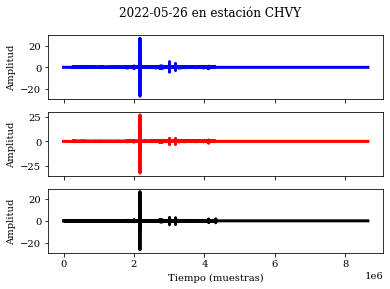

In [40]:
# Definición del nombre de la figura
figure_name = 'Datos_estación_' + station_name
 
# Creación de la figura
fig1 = plt.figure(figure_name)
#fig1.title(data['metadata']['date'])

# Creación del vector tiempo con la duración del tamaño de los datos
time = np.linspace(0., len(data['waveforms'][0][0]), len(data['waveforms'][0][0]))

# Primer subplot
ax1 = fig1.add_subplot(311)
# Grafica de la componente E-W
ax1.plot(time, data['waveforms'][station_id][0], color='blue', lw=3)#[2][samp_ini:samp_fin], lw=3)
ax1.set_ylabel('Amplitud')
ax1.set_xticklabels([])

# Primer subplot
ax2 = fig1.add_subplot(312)
# Grafica de la componente E-W
ax2.plot(time, data['waveforms'][station_id][1], color='red', lw=3)#[2][samp_ini:samp_fin], lw=3)
ax2.set_ylabel('Amplitud')
ax2.set_xticklabels([])

# Primer subplot
ax3 = fig1.add_subplot(313)
# Grafica de la componente E-W
ax3.plot(time, data['waveforms'][station_id][2], color='black', lw=3)#[2][samp_ini:samp_fin], lw=3)
ax3.set_ylabel('Amplitud')

ax3.set_xlabel('Tiempo (muestras)')

# Definición del tamaño de letra en las figuras
font = {'family': 'serif',
        'size': 25}

#print(data['metadata']['date'][0:10])
fig1.suptitle(date + ' en estación ' + station_name)
# Mostrar la figura
fig1.show()
